In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
base_path = ''

In [2]:
df = pd.read_csv(base_path + 'df1005.csv') # 1015 인데 1005로 저장 잘못했네..
df

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday
0,2021-05-27,8801068097474,땅콩샌드,1.0,1100.0,1100.0,5,3
1,2021-05-29,8801068097474,땅콩샌드,1.0,1100.0,1100.0,5,5
2,2021-05-29,8801068097474,땅콩샌드,1.0,1100.0,1100.0,5,5
3,2021-05-30,8801068097474,땅콩샌드,1.0,1100.0,1100.0,5,6
4,2021-05-31,8801068097474,땅콩샌드,1.0,1100.0,1100.0,5,0
...,...,...,...,...,...,...,...,...
23660707,2022-08-27,9556486800210,망고푸딩,1.0,3500.0,3500.0,8,5
23660708,2022-08-28,9556486800210,망고푸딩,1.0,3500.0,3500.0,8,6
23660709,2022-09-13,9556486800210,망고푸딩,1.0,3500.0,3500.0,9,1
23660710,2022-09-20,9556486800210,망고푸딩,1.0,3500.0,3500.0,9,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23660712 entries, 0 to 23660711
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   SAL_DT    object 
 1   PLU_CD    int64  
 2   GDS_NM    object 
 3   SALE_QTY  float64
 4   SALE_PRC  float64
 5   SALE_AMT  float64
 6   month     int64  
 7   weekday   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.4+ GB


In [4]:
df = df.astype({'SALE_QTY' : 'int'})

In [5]:
df = df.astype({'SALE_PRC' : 'int'})

In [6]:
df = df.astype({'SALE_AMT' : 'int'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23660712 entries, 0 to 23660711
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   SAL_DT    object
 1   PLU_CD    int64 
 2   GDS_NM    object
 3   SALE_QTY  int32 
 4   SALE_PRC  int32 
 5   SALE_AMT  int32 
 6   month     int64 
 7   weekday   int64 
dtypes: int32(3), int64(3), object(2)
memory usage: 1.1+ GB


In [8]:
df['GDS_NM'].value_counts()

대파1단           127103
흙당근            102456
서울우유            93327
감자              86819
대파              77448
                ...  
라일락슬림65mg갑          1
고구마빵                1
백설딸기요거트드레싱          1
2단우산체크              1
아기상어우주선분수놀이         1
Name: GDS_NM, Length: 95292, dtype: int64

In [9]:
import prophet

In [10]:
data = df[['SAL_DT', 'SALE_QTY', 'SALE_PRC', 'SALE_AMT']]
data

,SAL_DT,SALE_QTY,SALE_PRC,SALE_AMT
0,2021-05-27,1,1100,1100
1,2021-05-29,1,1100,1100
2,2021-05-29,1,1100,1100
3,2021-05-30,1,1100,1100
4,2021-05-31,1,1100,1100
...,...,...,...,...
23660707,2022-08-27,1,3500,3500
23660708,2022-08-28,1,3500,3500
23660709,2022-09-13,1,3500,3500
23660710,2022-09-20,1,3500,3500


In [11]:
data['SAL_DT'] = pd.to_datetime(data['SAL_DT'])

C:\Users\min\AppData\Local\Temp\ipykernel_17600\249976737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SAL_DT'] = pd.to_datetime(data['SAL_DT'])


In [12]:
data

,SAL_DT,SALE_QTY,SALE_PRC,SALE_AMT
0,2021-05-27,1,1100,1100
1,2021-05-29,1,1100,1100
2,2021-05-29,1,1100,1100
3,2021-05-30,1,1100,1100
4,2021-05-31,1,1100,1100
...,...,...,...,...
23660707,2022-08-27,1,3500,3500
23660708,2022-08-28,1,3500,3500
23660709,2022-09-13,1,3500,3500
23660710,2022-09-20,1,3500,3500


In [13]:
data = data[['SAL_DT', 'SALE_QTY']]
data

,SAL_DT,SALE_QTY
0,2021-05-27,1
1,2021-05-29,1
2,2021-05-29,1
3,2021-05-30,1
4,2021-05-31,1
...,...,...
23660707,2022-08-27,1
23660708,2022-08-28,1
23660709,2022-09-13,1
23660710,2022-09-20,1


In [14]:
data.sort_values('SAL_DT')

,SAL_DT,SALE_QTY
14646504,2020-12-20,1
22301250,2020-12-20,2
22301249,2020-12-20,1
22301248,2020-12-20,1
21149152,2020-12-20,1
...,...,...
1593893,2022-09-30,1
4962456,2022-09-30,2
4962455,2022-09-30,1
12149450,2022-09-30,1


In [15]:
data = data.groupby('SAL_DT').sum()
data

,SALE_QTY
SAL_DT,
2020-12-20,20352
2020-12-21,20187
2020-12-22,18765
2020-12-23,17249
2020-12-24,20911
...,...
2022-09-26,52163
2022-09-27,52983
2022-09-28,53962


In [16]:
data.index

DatetimeIndex(['2020-12-20', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='SAL_DT', length=650, freq=None)

<AxesSubplot:xlabel='SAL_DT', ylabel='SALE_QTY'>

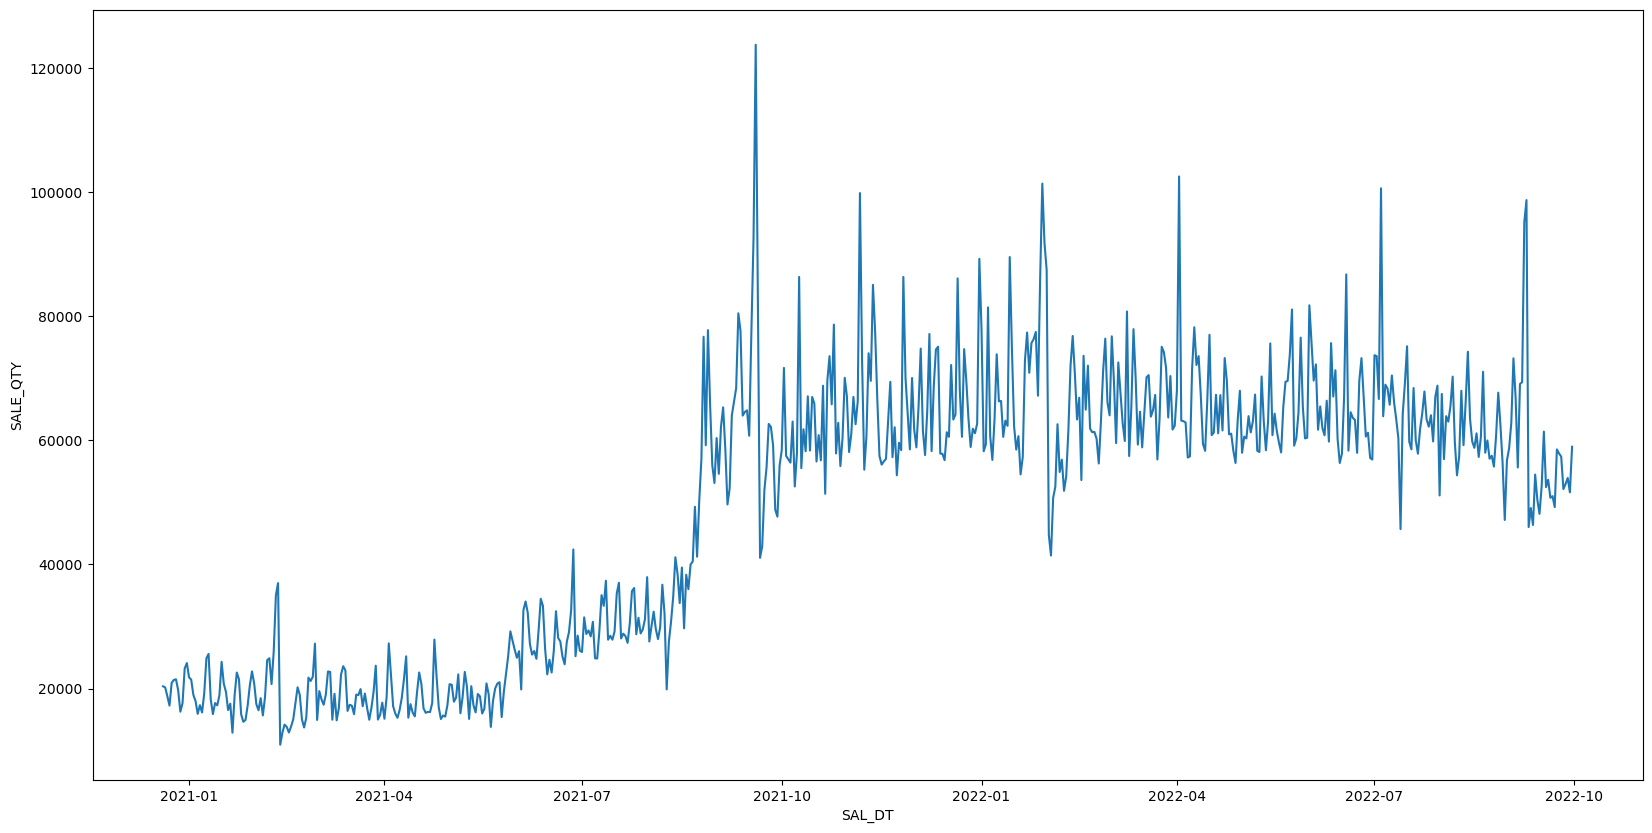

In [17]:
plt.figure(figsize = (20,10))
sns.lineplot(x = data.index, y = data['SALE_QTY'])

<AxesSubplot:xlabel='SAL_DT'>

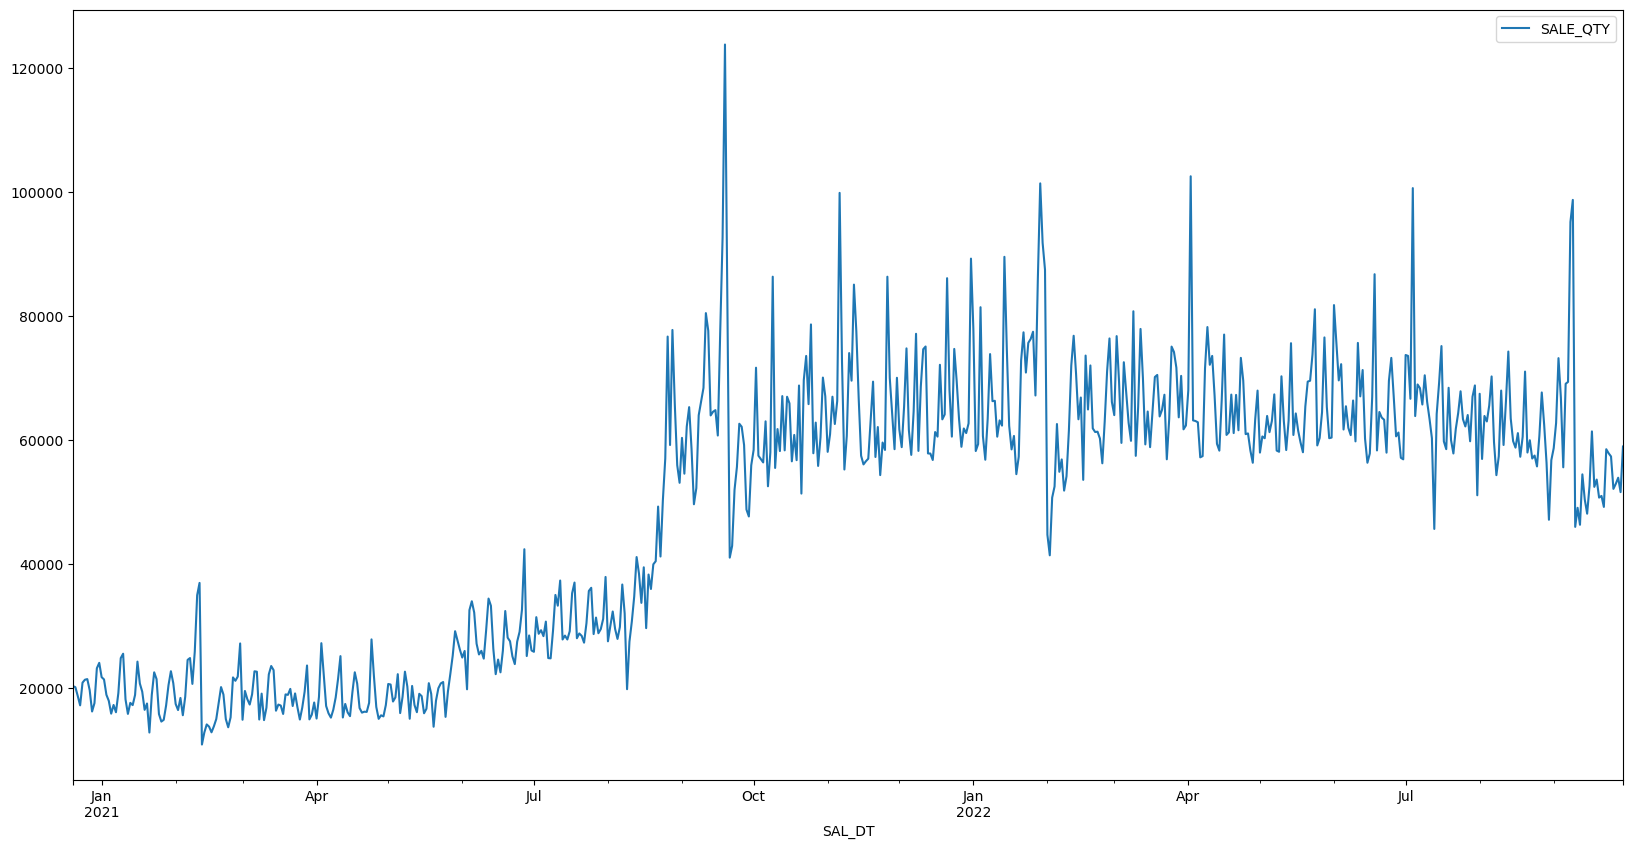

In [18]:
data.plot(figsize = (20,10))

In [19]:
data.resample('MS').mean() # 월별

,SALE_QTY
SAL_DT,
2020-12-01,20103.500000
2021-01-01,18980.741935
2021-02-01,19338.214286
2021-03-01,18406.967742
2021-04-01,18463.900000
2021-05-01,19878.096774
2021-06-01,28038.966667
2021-07-01,30587.774194
2021-08-01,41399.129032


In [20]:
df = data.reset_index()

In [21]:
df

,SAL_DT,SALE_QTY
0,2020-12-20,20352
1,2020-12-21,20187
2,2020-12-22,18765
3,2020-12-23,17249
4,2020-12-24,20911
...,...,...
645,2022-09-26,52163
646,2022-09-27,52983
647,2022-09-28,53962
648,2022-09-29,51639


In [22]:
df.columns = ['ds','y']

In [23]:
df

,ds,y
0,2020-12-20,20352
1,2020-12-21,20187
2,2020-12-22,18765
3,2020-12-23,17249
4,2020-12-24,20911
...,...,...
645,2022-09-26,52163
646,2022-09-27,52983
647,2022-09-28,53962
648,2022-09-29,51639


In [27]:
from prophet import Prophet

In [28]:
m = Prophet()
m.add_country_holidays(country_name='KR')
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\min\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [29]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1010,2023-09-26
1011,2023-09-27
1012,2023-09-28
1013,2023-09-29
1014,2023-09-30


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\min\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\min\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
1010,2023-09-26,41578.413942,2746.166307,81391.263743
1011,2023-09-27,41825.300806,4017.680990,82327.649739
1012,2023-09-28,72479.706506,34512.731717,113525.199019
1013,2023-09-29,27632.028629,-11302.146252,67984.770872
1014,2023-09-30,38201.954724,-890.896706,78760.146564
